## ROUND HILL 1

# SO2_CONCENTRATIONS_1.CSV

In [243]:
#Importiamo le librerie 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler

#Leggiamo il dataset
dataset = pd.read_csv('SO2_Concentrations_1.csv')

#dataset.head()


# EmissionRate_and_Coorections.csv

In [244]:
#Leggiamo il dataset
import pandas as pd
df_corrections = pd.read_csv('EmissionRate_and_Corrections.csv')

#df_corrections.head()

# Metrology.csv

In [245]:
#Leggiamo il dataset
df_meteo = pd.read_csv('Meteorology.csv')
#df_meteo.head()

# Sostituire il valore -99 (considerato come "Missing valuse") con NaN
df_meteo.replace(-99, np.nan, inplace=True)

#df_meteo.head()

Migliorare la lettura del dataset 'SO2_Concentrations_1.csv', eliminando la riga "Run #" e impostandola come colonna specifica
(ci servirà per un merge successivo).

In [246]:
# Leggi tutte le righe del file
with open('SO2_Concentrations_1.csv', "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

data = []
run_id = None
header = None

for line in lines:
    if line.startswith("Run"):
        run_id = line.strip()  # Es: "Run 1"
    elif header is None:
        # Prima intestazione
        header = line.split(",")
        header = [h.strip() for h in header]
    else:
        # Riga di dati
        values = line.split(",")
        values = [v.strip() for v in values]
        # Padding per righe più corte
        values += [None] * (len(header) - len(values))
        row = dict(zip(header, values))
        row["Run"] = run_id
        data.append(row)

# Crea il DataFrame
new_df = pd.DataFrame(data)

# Conversione numerica automatica dove possibile
new_df = new_df.apply(pd.to_numeric, errors='ignore')

# Rimuovi spazi bianchi e converti in float (forzata perché altrimenti dava type = 'object')
for col in ["Wind-Dir (%)","Concentrations (mg/m3) 50", "Concentrations (mg/m3) 100", "Concentrations (mg/m3) 200"]:
    new_df[col] = pd.to_numeric(new_df[col], errors="coerce")

# Estrai solo il numero dal campo "Run" e mettilo come intero
new_df["Run"] = new_df["Run"].astype(str).str.extract(r"(\d+)").astype(int)

# Porta la colonna "Run" come prima colonna
# Ottieni la lista di tutte le colonne
cols = new_df.columns.tolist()
# Sposta "Run" in prima posizione
cols.insert(0, cols.pop(cols.index("Run")))
# Riordina il DataFrame
new_df = new_df[cols]

# Risultato
# print(new_df.head(1))
# print(new_df.tail(1))



C:\Users\utente\AppData\Local\Temp\ipykernel_10340\1244781057.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_df = new_df.apply(pd.to_numeric, errors='ignore')


## Data Understanding

In [247]:
new_df

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
0,1,7,18,43,NaN,NaN,NaN,NaN
1,1,8,21,46,NaN,NaN,NaN,NaN
2,1,9,24,49,NaN,NaN,NaN,0.010
3,1,10,27,52,0.42,NaN,NaN,0.015
4,1,11,30,55,NaN,NaN,NaN,0.005
...,...,...,...,...,...,...,...,...
897,29,27,78,103,4.32,3.330,0.38,0.035
898,29,28,81,106,0.66,0.710,0.07,NaN
899,29,29,84,109,0.17,0.015,NaN,NaN
900,29,30,87,112,0.17,NaN,NaN,NaN


In [248]:
#Visualizziamo i tipi delle colonne
print(f"{new_df.dtypes}\n")

n_samples, n_features = new_df.shape

print("Numero di samples/righe, Numero di colonne:")
print((n_samples, n_features))

Run                             int32
Post Number                     int64
Degrees                         int64
Azimuth (Degrees)               int64
Wind-Dir (%)                  float64
Concentrations (mg/m3) 50     float64
Concentrations (mg/m3) 100    float64
Concentrations (mg/m3) 200    float64
dtype: object

Numero di samples/righe, Numero di colonne:
(902, 8)


In [249]:
new_df.describe()

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
count,902.000000,902.000000,902.000000,902.000000,728.000000,757.000000,636.000000,519.000000
mean,13.465632,30.002217,87.006652,112.006652,3.982143,7.760945,3.388656,1.480906
std,8.329403,14.292178,42.876535,42.876535,4.082794,12.876222,6.833575,5.183185
min,1.000000,1.000000,0.000000,25.000000,0.160000,0.010000,0.005000,0.005000
25%,6.000000,19.000000,54.000000,79.000000,0.837500,0.540000,0.191250,0.060000
50%,13.000000,29.000000,84.000000,109.000000,2.490000,3.240000,1.005000,0.270000
75%,20.000000,40.000000,117.000000,142.000000,5.910000,8.350000,2.690000,0.690000
max,29.000000,62.000000,183.000000,208.000000,22.670000,131.000000,67.700000,96.000000


In [250]:
#Verifica dati mancanti 

missing_values = new_df.isnull().sum()
print(missing_values)

Run                             0
Post Number                     0
Degrees                         0
Azimuth (Degrees)               0
Wind-Dir (%)                  174
Concentrations (mg/m3) 50     145
Concentrations (mg/m3) 100    266
Concentrations (mg/m3) 200    383
dtype: int64


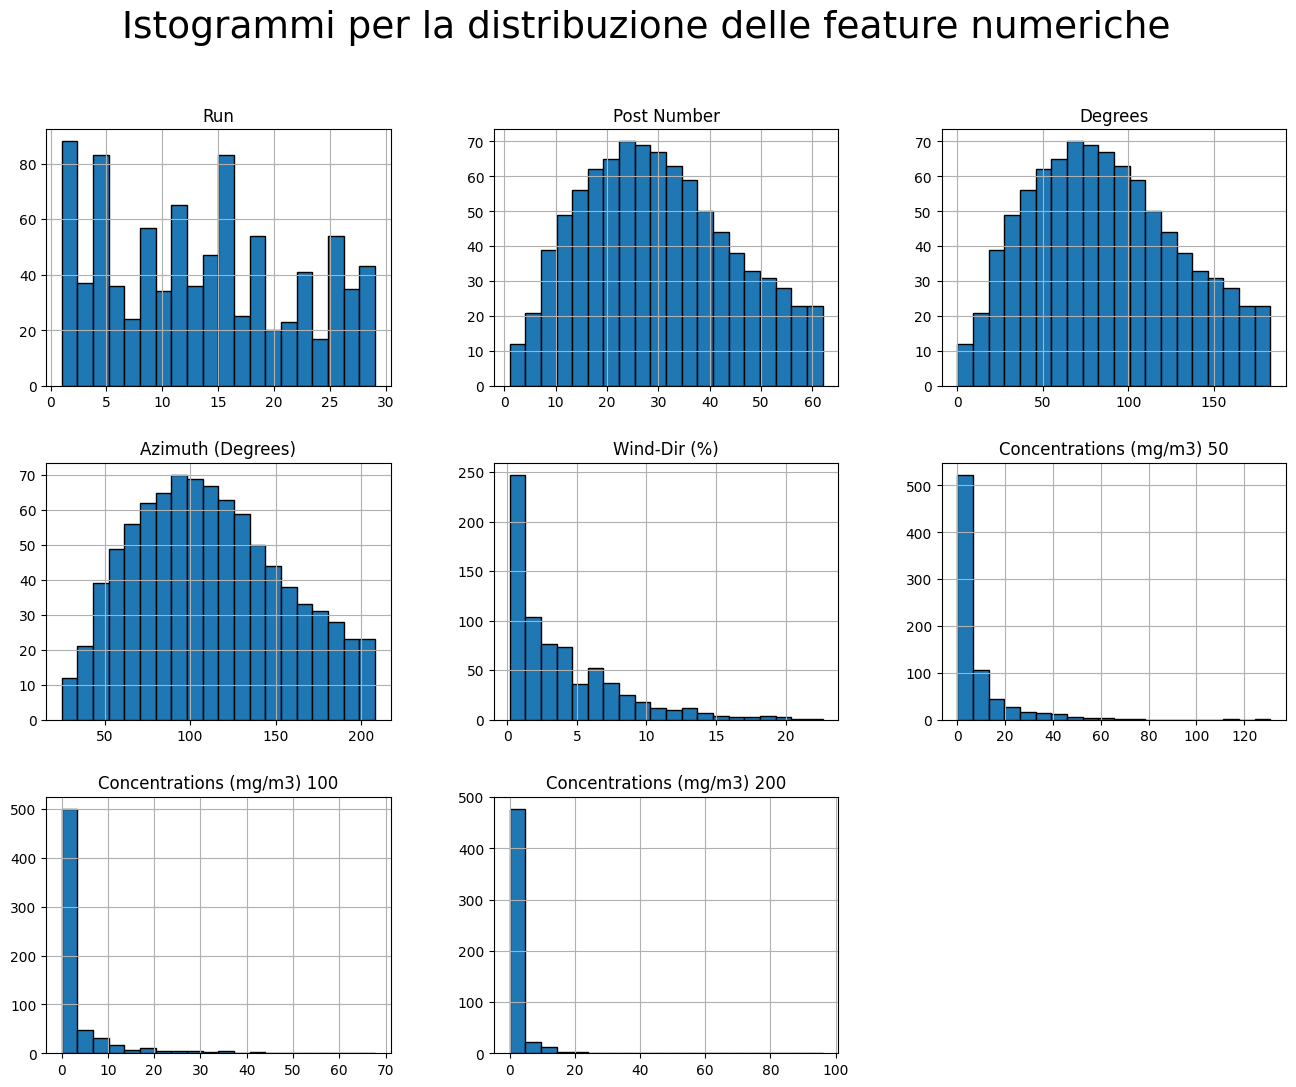

In [251]:
# Istogrammi per la distribuzione delle feature numeriche

new_df.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Istogrammi per la distribuzione delle feature numeriche", fontsize=27)
plt.show()

Matrice di correlazione:



Text(0.5, 1.0, 'Matrice di correlazione')

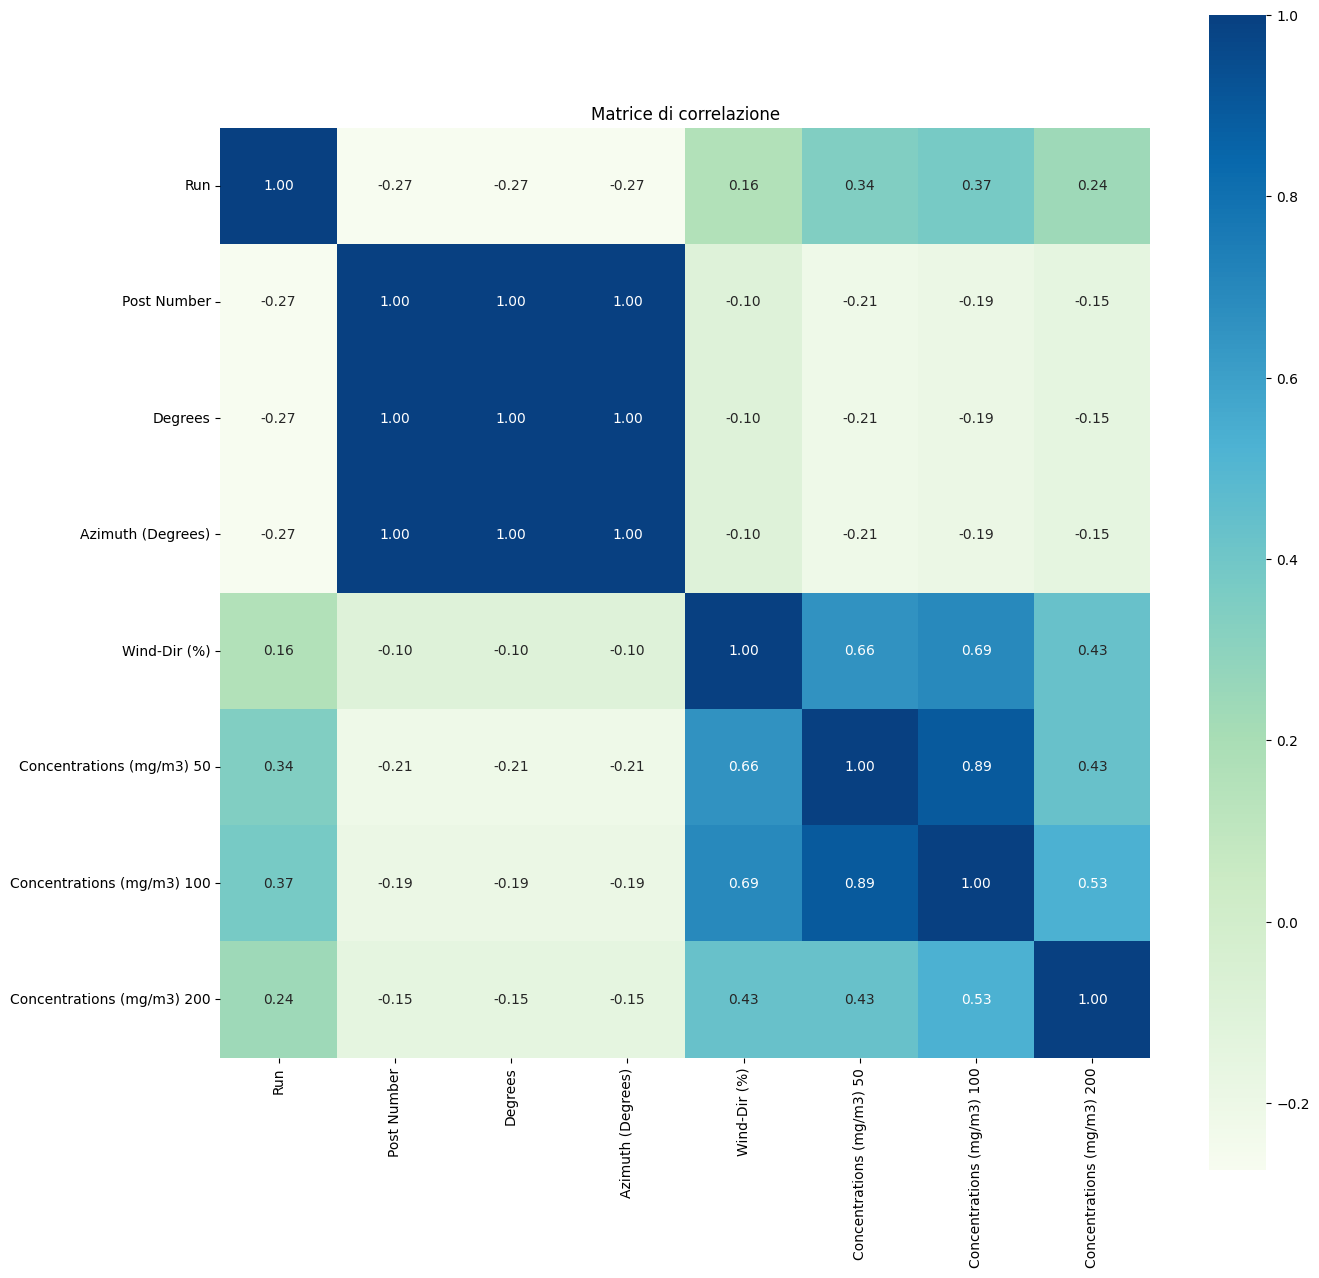

In [252]:
print('Matrice di correlazione:\n')
corr_matrix = new_df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione')

In [253]:
#stessa identica cosa del plot di sopra.

#Show the relationship between the columns:
new_df.corr()

#Il risultato del corr() metodo è una tabella con molti numeri che rappresentano il livello di relazione tra due colonne.

#Il numero varia da -1 a 1.

#1 significa che esiste una relazione 1 a 1 (una correlazione perfetta) e, per questo set di dati, ogni volta che un valore aumentava nella prima colonna, aumentava anche l'altra.

#Anche 0,9 è un buon rapporto: se si aumenta un valore, probabilmente aumenterà anche l'altro.

#-0,9 sarebbe un rapporto altrettanto buono di 0,9, ma se si aumenta un valore, l'altro probabilmente diminuirà.

#0,2 significa NON un buon rapporto, nel senso che se un valore aumenta non significa che lo farà anche l'altro.

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
Run,1.000000,-0.273960,-0.273960,-0.273960,0.163371,0.341417,0.374996,0.239321
Post Number,-0.273960,1.000000,1.000000,1.000000,-0.099147,-0.211255,-0.193446,-0.147265
Degrees,-0.273960,1.000000,1.000000,1.000000,-0.099147,-0.211255,-0.193446,-0.147265
Azimuth (Degrees),-0.273960,1.000000,1.000000,1.000000,-0.099147,-0.211255,-0.193446,-0.147265
Wind-Dir (%),0.163371,-0.099147,-0.099147,-0.099147,1.000000,0.656004,0.691514,0.431296
Concentrations (mg/m3) 50,0.341417,-0.211255,-0.211255,-0.211255,0.656004,1.000000,0.894999,0.430396
Concentrations (mg/m3) 100,0.374996,-0.193446,-0.193446,-0.193446,0.691514,0.894999,1.000000,0.530209
Concentrations (mg/m3) 200,0.239321,-0.147265,-0.147265,-0.147265,0.431296,0.430396,0.530209,1.000000


In [254]:
# new_df.keys()

## Data cleaning

In [255]:
## Funzione per regolare le cifre significative

def regola_cifre_significative(valore, cifre):
    if pd.isna(valore):  # Gestisce i NaN
        return valore
    else:
        return float(f"{valore:.{cifre}g}")

# Applica la funzione a tutto il dataset
cifre_significative = 5  ##tutte es 9.2548

Data imputation easy: sostituire NaN con la media

In [256]:
## 1 - colonna Wind-Dir (%)
win_dir_mean = new_df["Wind-Dir (%)"].mean()
win_dir_mean = regola_cifre_significative(win_dir_mean, cifre_significative)
# print(win_dir_mean)

##
new_df["Wind-Dir (%)"].fillna(win_dir_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\33151651.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Wind-Dir (%)"].fillna(win_dir_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
0,1,7,18,43,3.9821,NaN,NaN,NaN
1,1,8,21,46,3.9821,NaN,NaN,NaN
2,1,9,24,49,3.9821,NaN,NaN,0.010
3,1,10,27,52,0.4200,NaN,NaN,0.015
4,1,11,30,55,3.9821,NaN,NaN,0.005
...,...,...,...,...,...,...,...,...
897,29,27,78,103,4.3200,3.330,0.38,0.035
898,29,28,81,106,0.6600,0.710,0.07,NaN
899,29,29,84,109,0.1700,0.015,NaN,NaN
900,29,30,87,112,0.1700,NaN,NaN,NaN


In [257]:
## 2 - colonna Concentrations (mg/m3) 50
con_50_mean = new_df["Concentrations (mg/m3) 50"].mean()
con_50_mean = regola_cifre_significative(con_50_mean, cifre_significative)
# print(con_50_mean)

## 
new_df["Concentrations (mg/m3) 50"].fillna(con_50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_df


C:\Users\utente\AppData\Local\Temp\ipykernel_10340\3715718308.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Concentrations (mg/m3) 50"].fillna(con_50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
0,1,7,18,43,3.9821,7.7609,NaN,NaN
1,1,8,21,46,3.9821,7.7609,NaN,NaN
2,1,9,24,49,3.9821,7.7609,NaN,0.010
3,1,10,27,52,0.4200,7.7609,NaN,0.015
4,1,11,30,55,3.9821,7.7609,NaN,0.005
...,...,...,...,...,...,...,...,...
897,29,27,78,103,4.3200,3.3300,0.38,0.035
898,29,28,81,106,0.6600,0.7100,0.07,NaN
899,29,29,84,109,0.1700,0.0150,NaN,NaN
900,29,30,87,112,0.1700,7.7609,NaN,NaN


In [258]:
## 3 - colonna Concentrations (mg/m3) 100
con_100_mean = new_df["Concentrations (mg/m3) 100"].mean()
con_100_mean = regola_cifre_significative(con_100_mean, cifre_significative)
# print(con_100_mean)

##
new_df["Concentrations (mg/m3) 100"].fillna(con_100_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_df


C:\Users\utente\AppData\Local\Temp\ipykernel_10340\3570975125.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Concentrations (mg/m3) 100"].fillna(con_100_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
0,1,7,18,43,3.9821,7.7609,3.3887,NaN
1,1,8,21,46,3.9821,7.7609,3.3887,NaN
2,1,9,24,49,3.9821,7.7609,3.3887,0.010
3,1,10,27,52,0.4200,7.7609,3.3887,0.015
4,1,11,30,55,3.9821,7.7609,3.3887,0.005
...,...,...,...,...,...,...,...,...
897,29,27,78,103,4.3200,3.3300,0.3800,0.035
898,29,28,81,106,0.6600,0.7100,0.0700,NaN
899,29,29,84,109,0.1700,0.0150,3.3887,NaN
900,29,30,87,112,0.1700,7.7609,3.3887,NaN


In [259]:
## 4 - colonna Concentrations (mg/m3) 200
con_200_mean = new_df["Concentrations (mg/m3) 200"].mean()
con_200_mean = regola_cifre_significative(con_200_mean, cifre_significative)
# print(con_200_mean)

##
new_df["Concentrations (mg/m3) 200"].fillna(con_200_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\614213458.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Concentrations (mg/m3) 200"].fillna(con_200_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
0,1,7,18,43,3.9821,7.7609,3.3887,1.4809
1,1,8,21,46,3.9821,7.7609,3.3887,1.4809
2,1,9,24,49,3.9821,7.7609,3.3887,0.0100
3,1,10,27,52,0.4200,7.7609,3.3887,0.0150
4,1,11,30,55,3.9821,7.7609,3.3887,0.0050
...,...,...,...,...,...,...,...,...
897,29,27,78,103,4.3200,3.3300,0.3800,0.0350
898,29,28,81,106,0.6600,0.7100,0.0700,1.4809
899,29,29,84,109,0.1700,0.0150,3.3887,1.4809
900,29,30,87,112,0.1700,7.7609,3.3887,1.4809


## Merge

Questo merge e questa moltiplicazione andava fatta in quanto nel foglio excel EmissionRate_and_Corrections c'è proprio scritto che il valore delle colonne "Evaporation Corrections #" dovevano essere moltiplicare con le colonne "Concentrations (mg/m3) #" per una sorta di correzione: per compensare la perdita per evaporazione della 'impinger solution' durante l'aerazione.

(nel pdf c'è proprio il disegno dei macchinari)

In [260]:
# Rinomina per uniformare
df_corrections.rename(columns={'Run Number': 'Run'}, inplace=True)

# Merge su "Run"
df_merged = pd.merge(new_df, df_corrections, on='Run', how='left')

# Moltiplicazione per correzione 50
df_merged['Corrected_Concentrations (mg/m3) 50'] = df_merged['Concentrations (mg/m3) 50'] * df_merged['Evaporation Corrections 50']

# per correzione 100
df_merged['Corrected_Concentrations (mg/m3) 100'] = df_merged['Concentrations (mg/m3) 100'] * df_merged['Evaporation Corrections 100']

# per correzione 200
df_merged['Corrected_Concentrations (mg/m3) 200'] = df_merged['Concentrations (mg/m3) 200'] * df_merged['Evaporation Corrections 200']


In [261]:
# Salva tutto in new_df, con le colonne corrette e senza aggiunte
new_df = df_merged.drop(columns=[
    'Concentrations (mg/m3) 50', 
    'Concentrations (mg/m3) 100', 
    'Concentrations (mg/m3) 200',
    'Evaporation Corrections 50',
    'Evaporation Corrections 100',
    'Evaporation Corrections 200',
    'Q (g/s)'
])

# new_df.head(1)

In [262]:
# Applica la funzione regola_cifre_significative() a tutte le colonne del DataFrame (di nuovo)
new_df = new_df.applymap(lambda x: regola_cifre_significative(x, cifre_significative) if isinstance(x, (int, float)) else x)

# new_df.head()

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\241734784.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = new_df.applymap(lambda x: regola_cifre_significative(x, cifre_significative) if isinstance(x, (int, float)) else x)


## ROUND HILL 2

# Data Cleaning

In [263]:
#⚠️⚠️⚠️⚠️⚠️⚠️⚠️ FARLO UNA VOLTA E BASTA, ALTRIMENTI RICARICA I CSV E CANCELLA TUTTE LE CORREZIONI FATTE A MANO NLE CSV ⚠️⚠️⚠️⚠️⚠️⚠️⚠️

#import pandas as pd

# Inserisci i percorsi dei tuoi file Excel
file1_path = "Metrology_HILL2.xlsx"
file2_path = "SO2_Concentration_Hill2.xlsx"
file3_path = "Emission_Hill2.xlsx"

# Caricamento dei file Excel
#metrology_df = pd.read_excel(file1_path)
#so2_df = pd.read_excel(file2_path)
#emission_df = pd.read_excel("Emission_Hill2.xlsx")

# Salvataggio in formato CSV
#metrology_df.to_csv("Metrology_HILL2.csv", index=False)
#so2_df.to_csv("SO2_Concentration_Hill2.csv", index=False)
#emission_df.to_csv("Emission_Hill2.csv", index=False)

# print("Conversione completata! I file CSV sono stati creati.")

In [264]:
import pandas as pd

metrology_df = pd.read_csv("Metrology_HILL2.csv")
so2_df = pd.read_csv("SO2_Concentration_Hill2.csv")
emission_df = pd.read_csv("Emission_Hill2.csv")

In [265]:
# Leggi tutte le righe del file
with open("SO2_Concentration_Hill2.csv", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

data = []
run_id = None
header = None

for line in lines:
    if line.startswith("Run"):
        run_id = line.strip()  # Es: "Run 1"
    elif header is None:
        # Prima intestazione
        header = line.split(",")
        header = [h.strip() for h in header]
    else:
        # Riga di dati
        values = line.split(",")
        values = [v.strip() for v in values]
        # Padding per righe più corte
        values += [None] * (len(header) - len(values))
        row = dict(zip(header, values))
        row["Run"] = run_id
        data.append(row)

# Crea il DataFrame
new_so2_df = pd.DataFrame(data)

# Conversione numerica automatica dove possibile
new_so2_df = new_so2_df.apply(pd.to_numeric, errors='ignore')

# Estrai solo il numero dal campo "Run" e mettilo come intero
new_so2_df["Run"] = new_so2_df["Run"].astype(str).str.extract(r"(\d+)").astype(int)

# Porta la colonna "Run" come prima colonna
# Ottieni la lista di tutte le colonne
cols = new_so2_df.columns.tolist()
# Sposta "Run" in prima posizione
cols.insert(0, cols.pop(cols.index("Run")))
# Riordina il DataFrame
new_so2_df = new_so2_df[cols]

# Risultato
# print(new_so2_df.head(1))
# print(new_so2_df.tail(1))

#new_so2_df.head()


C:\Users\utente\AppData\Local\Temp\ipykernel_10340\1417309593.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_so2_df = new_so2_df.apply(pd.to_numeric, errors='ignore')


In [266]:
# Elimina le colonne specificATE perché ridondanti
new_so2_df= new_so2_df.drop(columns=["2-Post Number", "3-Post Number", "4-Post Number"])

new_so2_df.head()

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,37,1.5,76.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,38,1.5,78.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,39,1.5,79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,40,1.5,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understandig

In [267]:
#Visualizziamo i tipi delle colonne
print(f"{new_so2_df.dtypes}\n")

n_samples, n_features = new_so2_df.shape

print("Numero di samples/righe, Numero di colonne:")
print((n_samples, n_features))

Run                                                     int32
Post Number                                             int64
Degrees                                               float64
Azimuth (Degrees)                                     float64
Wind-Dir (%)                                          float64
10-min Concentrations (mg/m3) 50                      float64
10-min Concentrations (mg/m3) 100                     float64
10-min Concentrations (mg/m3) 200                     float64
3-min Concentrations (mg/m3) 50                       float64
3-min Concentrations (mg/m3) 100                      float64
3-min Concentrations (mg/m3) 200                      float64
0.5-min Concentrations (mg/m3) 50                     float64
0.5-min Concentrations (mg/m3) 100                    float64
0.5-min Concentrations (mg/m3) 200                    float64
Height (m)                                            float64
10-min Vertical Samples Concentrations (mg/m3) 50     float64
10-min V

In [268]:
new_so2_df.describe()

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
count,568.000000,568.000000,568.0,568.000000,234.000000,237.000000,198.000000,154.000000,351.000000,278.000000,224.000000,264.000000,198.000000,144.000000,137.000000,136.000000,78.000000,60.000000
mean,5.658451,52.984155,1.5,100.476232,4.273504,77.101781,27.959217,8.915799,111.492761,41.867317,9.799205,154.550795,64.134949,11.471667,4.847445,86.326191,29.573128,9.330500
std,2.950425,18.677381,0.0,28.016071,3.633719,97.552207,49.943548,19.006679,138.146072,62.434665,20.479717,178.479488,98.025240,9.636693,26.608162,145.512940,72.944960,36.376134
min,1.000000,9.000000,1.5,34.500000,0.420000,-99.000000,0.013000,0.038000,-99.000000,0.073000,-99.000000,-99.000000,0.560000,0.400000,0.500000,0.026000,-99.000000,-99.000000
25%,3.000000,39.000000,1.5,79.500000,1.250000,5.890000,2.122500,1.012500,13.750000,4.347500,1.230000,23.100000,8.440000,3.095000,0.500000,10.650000,3.535000,1.150000
50%,6.000000,53.000000,1.5,100.500000,3.330000,41.400000,14.200000,3.380000,66.000000,21.700000,5.300000,106.000000,24.000000,9.200000,1.000000,44.500000,11.550000,2.765000
75%,8.000000,67.250000,1.5,121.875000,6.542500,106.000000,29.075000,8.782500,149.000000,47.700000,12.225000,214.500000,78.700000,18.200000,2.500000,110.000000,25.825000,11.725000
max,10.000000,95.000000,1.5,163.500000,25.420000,494.000000,285.000000,137.000000,663.000000,383.000000,131.000000,1088.000000,476.000000,41.000000,264.000000,1225.000000,482.000000,158.000000


In [269]:
#Verifica dati mancanti 

missing_values = new_so2_df.isnull().sum()
print(missing_values)

Run                                                     0
Post Number                                             0
Degrees                                                 0
Azimuth (Degrees)                                       0
Wind-Dir (%)                                          334
10-min Concentrations (mg/m3) 50                      331
10-min Concentrations (mg/m3) 100                     370
10-min Concentrations (mg/m3) 200                     414
3-min Concentrations (mg/m3) 50                       217
3-min Concentrations (mg/m3) 100                      290
3-min Concentrations (mg/m3) 200                      344
0.5-min Concentrations (mg/m3) 50                     304
0.5-min Concentrations (mg/m3) 100                    370
0.5-min Concentrations (mg/m3) 200                    424
Height (m)                                            431
10-min Vertical Samples Concentrations (mg/m3) 50     432
10-min Vertical Samples Concentrations (mg/m3) 100    490
10-min Vertica

Matrice di correlazione:



Text(0.5, 1.0, 'Matrice di correlazione')

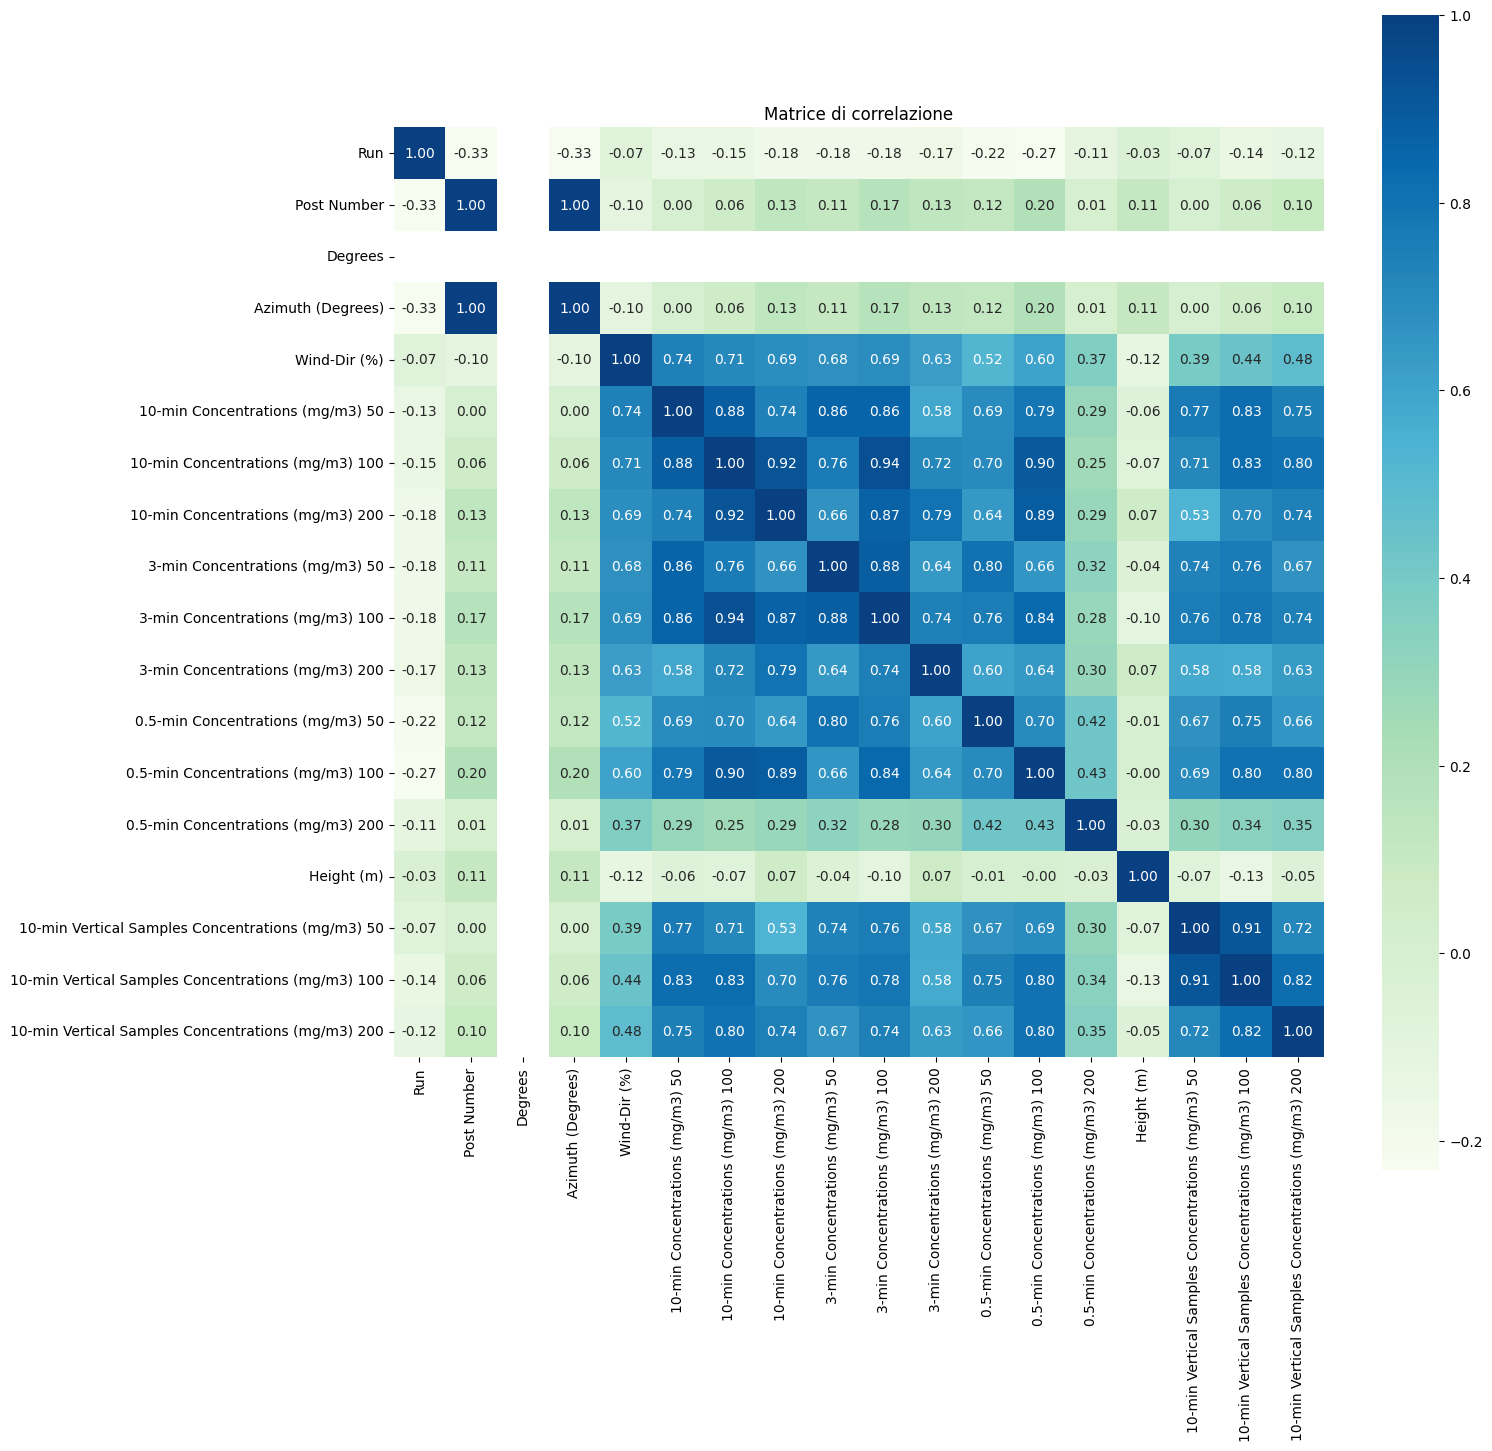

In [270]:
print('Matrice di correlazione:\n')
corr_matrix = new_so2_df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione')

Data imputation easy: sostituire NaN con la media

In [271]:
cifre_significative2 = 2  ##tutte es 9.2

In [272]:
## 1 - colonna Wind-Dir (%)
win_dir_mean = new_so2_df["Wind-Dir (%)"].mean()
win_dir_mean = regola_cifre_significative(win_dir_mean, cifre_significative)
# print(win_dir_mean)

##
new_so2_df["Wind-Dir (%)"].fillna(win_dir_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_so2_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\1012915863.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["Wind-Dir (%)"].fillna(win_dir_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,37,1.5,76.5,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,38,1.5,78.0,0.4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,39,1.5,79.5,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,40,1.5,81.0,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,10,76,1.5,135.0,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,10,77,1.5,136.5,4.2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,10,78,1.5,138.0,0.4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
## 10-min
## 2 - colonna Concentrations (mg/m3) 50
corr50_mean = new_so2_df["10-min Concentrations (mg/m3) 50"].mean()
corr50_mean = regola_cifre_significative(corr50_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["10-min Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 3 - colonna Concentrations (mg/m3) 100
corr100_mean = new_so2_df["10-min Concentrations (mg/m3) 100"].mean()
corr100_mean = regola_cifre_significative(corr100_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["10-min Concentrations (mg/m3) 100"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 4 - colonna Concentrations (mg/m3) 200
corr200_mean = new_so2_df["10-min Concentrations (mg/m3) 200"].mean()
corr200_mean = regola_cifre_significative(corr200_mean, cifre_significative)

##
new_so2_df["10-min Concentrations (mg/m3) 200"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_so2_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\589388369.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["10-min Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato
C:\Users\utente\AppData\Local\Temp\ipykernel_10340\589388369.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,38,1.5,78.0,0.4200,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,39,1.5,79.5,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,40,1.5,81.0,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,10,76,1.5,135.0,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,10,77,1.5,136.5,4.2735,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,10,78,1.5,138.0,0.4200,77.102,77.102,77.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
## 3-min
## 2 - colonna Concentrations (mg/m3) 50
corr50_mean = new_so2_df["3-min Concentrations (mg/m3) 50"].mean()
corr50_mean = regola_cifre_significative(corr50_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["3-min Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 3 - colonna Concentrations (mg/m3) 100
corr100_mean = new_so2_df["3-min Concentrations (mg/m3) 100"].mean()
corr100_mean = regola_cifre_significative(corr100_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["3-min Concentrations (mg/m3) 100"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 4 - colonna Concentrations (mg/m3) 200
corr200_mean = new_so2_df["3-min Concentrations (mg/m3) 200"].mean()
corr200_mean = regola_cifre_significative(corr200_mean, cifre_significative)

##
new_so2_df["3-min Concentrations (mg/m3) 200"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_so2_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\1678328040.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["3-min Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato
C:\Users\utente\AppData\Local\Temp\ipykernel_10340\1678328040.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,38,1.5,78.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,39,1.5,79.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,40,1.5,81.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,10,76,1.5,135.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,10,77,1.5,136.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,10,78,1.5,138.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
## 0.5-min
## 2 - colonna Concentrations (mg/m3) 50
corr50_mean = new_so2_df["0.5-min Concentrations (mg/m3) 50"].mean()
corr50_mean = regola_cifre_significative(corr50_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["0.5-min Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 3 - colonna Concentrations (mg/m3) 100
corr100_mean = new_so2_df["0.5-min Concentrations (mg/m3) 100"].mean()
corr100_mean = regola_cifre_significative(corr100_mean, cifre_significative)

##
new_so2_df["0.5-min Concentrations (mg/m3) 100"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 4 - colonna Concentrations (mg/m3) 200
corr200_mean = new_so2_df["0.5-min Concentrations (mg/m3) 200"].mean()
corr200_mean = regola_cifre_significative(corr200_mean, cifre_significative)

##
new_so2_df["0.5-min Concentrations (mg/m3) 200"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_so2_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\929177695.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["0.5-min Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato
C:\Users\utente\AppData\Local\Temp\ipykernel_10340\929177695.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
1,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
2,1,38,1.5,78.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
3,1,39,1.5,79.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
4,1,40,1.5,81.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
564,10,76,1.5,135.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
565,10,77,1.5,136.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN
566,10,78,1.5,138.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,NaN,NaN,NaN,NaN


In [276]:
## 
height_mean = new_so2_df["Height (m)"].mean()
print(height_mean)

height_mean1 = regola_cifre_significative(height_mean, cifre_significative2)
print(height_mean1)

new_so2_df["Height (m)"].fillna(height_mean1, inplace=True)


new_so2_df

4.847445255474453
4.8


C:\Users\utente\AppData\Local\Temp\ipykernel_10340\3908489446.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["Height (m)"].fillna(height_mean1, inplace=True)


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
1,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
2,1,38,1.5,78.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
3,1,39,1.5,79.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
4,1,40,1.5,81.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
564,10,76,1.5,135.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
565,10,77,1.5,136.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN
566,10,78,1.5,138.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,NaN,NaN,NaN


In [277]:
## 10-min
## 2 - 10-min Vertical Samples Concentrations (mg/m3) 50
corr50_mean = new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 50"].mean()
corr50_mean = regola_cifre_significative(corr50_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 3 - colonna Concentrations (mg/m3) 100
corr100_mean = new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 100"].mean()
corr100_mean = regola_cifre_significative(corr100_mean, cifre_significative)
# print(corr50_mean)

##
new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 100"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

## 4 - colonna Concentrations (mg/m3) 200
corr100_mean = new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 100"].mean()
corr200_mean = regola_cifre_significative(corr200_mean, cifre_significative)

##
new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 200"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato

new_so2_df

C:\Users\utente\AppData\Local\Temp\ipykernel_10340\4221752298.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["10-min Vertical Samples Concentrations (mg/m3) 50"].fillna(corr50_mean, inplace=True)  # Replace NaN with il paramentro esplicito passato
C:\Users\utente\AppData\Local\Temp\ipykernel_10340\4221752298.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will neve

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
1,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
2,1,38,1.5,78.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
3,1,39,1.5,79.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
4,1,40,1.5,81.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
564,10,76,1.5,135.0,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
565,10,77,1.5,136.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
566,10,78,1.5,138.0,0.4200,77.102,77.102,77.102,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326


# Merge

In [278]:
# Carica i due file
db1 = new_so2_df
db2 = emission_df

# Merge sui valori della colonna 'Run'
merged = pd.merge(db2, db1, on='Run', how='left')

# Moltiplica le colonne specificate per 'Correction 10-min'
for col in [
    '10-min Concentrations (mg/m3) 50',
    '10-min Concentrations (mg/m3) 100',
    '10-min Concentrations (mg/m3) 200'
]:
    merged[col] = merged[col] * merged['Correction 10-min']

# Salva il risultato finale
merged.head()

,Run,Source Strength (g/s) 10-min,Source Strength (g/s) 3-min,Source Strength (g/s) 0.5-min,Correction 10-min,Correction 3-min,Correction 0.5-min,Post Number,Degrees,Azimuth (Degrees),...,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,45.1,45.1,45.1,0.9,0.92,0.83,37,1.5,76.5,...,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
1,1,45.1,45.1,45.1,0.9,0.92,0.83,37,1.5,76.5,...,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
2,1,45.1,45.1,45.1,0.9,0.92,0.83,38,1.5,78.0,...,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
3,1,45.1,45.1,45.1,0.9,0.92,0.83,39,1.5,79.5,...,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326
4,1,45.1,45.1,45.1,0.9,0.92,0.83,40,1.5,81.0,...,111.49,111.49,111.49,154.55,154.55,154.55,4.8,86.326,86.326,86.326


In [279]:
# Carica i due file
#db1 = new_so2_df
#db2 = emission_df

# Merge sui valori della colonna 'Run'
merged = pd.merge(db2, db1, on='Run', how='left')

# Moltiplica le colonne specificate per 'Correction 10-min'
for col in [
    '3-min Concentrations (mg/m3) 50',
    '3-min Concentrations (mg/m3) 100',
    '3-min Concentrations (mg/m3) 200'
]:
    merged[col] = merged[col] * merged['Correction 3-min']

# Salva il risultato finale
#merged.head()

In [280]:
# Merge sui valori della colonna 'Run'
merged = pd.merge(db2, db1, on='Run', how='left')

# Moltiplica le colonne specificate per 'Correction 10-min'
for col in [
    '0.5-min Concentrations (mg/m3) 50',
    '0.5-min Concentrations (mg/m3) 100',
    '0.5-min Concentrations (mg/m3) 200'
]:
    merged[col] = merged[col] * merged['Correction 0.5-min']

# Salva il risultato finale
# merged.head()

In [281]:
# Salva tutto in new_so2_df, con le colonne corrette e senza aggiunte
new_so2_df = merged.drop(columns=[
    'Source Strength (g/s) 10-min',
    'Source Strength (g/s) 3-min',
    'Source Strength (g/s) 0.5-min',
    'Correction 10-min',
    'Correction 3-min',
    'Correction 0.5-min',
])

new_so2_df.head(1)

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,77.102,77.102,111.49,111.49,111.49,128.2765,128.2765,128.2765,4.8,86.326,86.326,86.326
